# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [32]:
# importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [7]:
# carregar base num dataframe
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

In [10]:
previsao_de_renda.head(n = 5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [12]:
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

#### Qual o valor da correlação das variáveis posse_de_imovel e posse_de_veiculo com a variável renda? Este cálculo é o mais correto?

In [14]:
previsao_de_renda_quali = previsao_de_renda[['posse_de_veiculo', 'posse_de_imovel', 'renda']]

In [16]:
# matriz de correlação
previsao_de_renda_quali.corr()

,posse_de_veiculo,posse_de_imovel,renda
posse_de_veiculo,1.000000,-0.014727,0.063414
posse_de_imovel,-0.014727,1.000000,0.029827
renda,0.063414,0.029827,1.000000


In [18]:
# cálculo da renda média por tipo de variável - veiculo e imóvel
renda_media_sem_veiculo = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_veiculo'] == False]['renda'].mean()
renda_media_com_veiculo = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_veiculo'] == True]['renda'].mean()
renda_media_sem_imovel = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_imovel'] == False]['renda'].mean()
renda_media_com_imovel = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_imovel'] == True]['renda'].mean()
renda_media_com_veiculo_e_imovel = previsao_de_renda_quali[(previsao_de_renda_quali['posse_de_imovel'] == True) & (previsao_de_renda_quali['posse_de_veiculo'] == True)]['renda'].mean()
renda_media_sem_veiculo_e_imovel = previsao_de_renda_quali[(previsao_de_renda_quali['posse_de_imovel'] == False) & (previsao_de_renda_quali['posse_de_veiculo'] == False)]['renda'].mean()

In [20]:
# visualização dos resultados
print("renda média das pessoas que não possuem veículo: ", renda_media_sem_veiculo)
print("renda média das pessoas que possuem veículo: ", renda_media_com_veiculo)
print("renda média das pessoas que não possuem imóvel: ", renda_media_sem_imovel)
print("renda média das pessoas que possuem imóvel: ", renda_media_com_imovel)
print("renda média das pessoas que possuem veículo e imóvel: ", renda_media_com_veiculo_e_imovel)
print("renda média das pessoas que não possuem veículo e imóvel: ", renda_media_sem_veiculo_e_imovel)

renda média das pessoas que não possuem veículo:  4390.506963019527
renda média das pessoas que possuem veículo:  4992.579609120521
renda média das pessoas que não possuem imóvel:  4426.970481903212
renda média das pessoas que possuem imóvel:  4721.052703828605
renda média das pessoas que possuem veículo e imóvel:  5057.2006149870795
renda média das pessoas que não possuem veículo e imóvel:  4135.868138747885


#### Os dados de renda seguem uma distribuição normal?

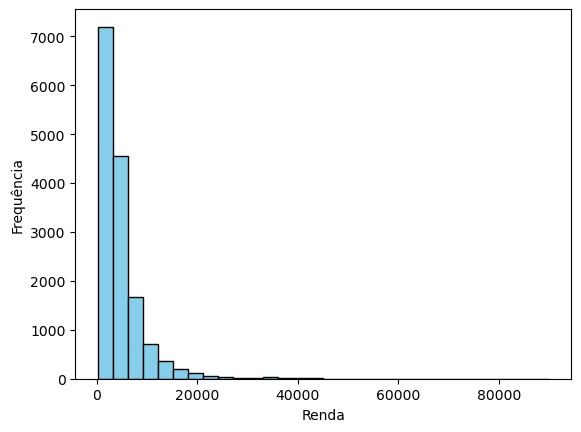

In [22]:
# histograma
plt.hist(previsao_de_renda_quali['renda'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()

#### Os dados não seguem uma distribuição normal - assimetria positiva. Qual o melhor teste para validar se os cálculos acima são estatisticamente significativos?

##### Neste caso, podemos aplicar o Teste de Mann Whitney U

In [34]:
# separar o dataframe em dois: possuem e não possuem veiculos
renda_veiculo = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_veiculo'] == True]['renda']
renda_sem_veiculo = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_veiculo'] == False]['renda']

In [36]:
# cálculo da estatística e do p-value
stat, p_val = mannwhitneyu(renda_veiculo, renda_sem_veiculo, alternative = 'two-sided')

In [40]:
print(f"Mann-Whitney U - Veiculo: estatistica = {stat: .4f}, p-valor = {p_val: .4f}")

Mann-Whitney U - Veiculo: estatistica =  29586616.5000, p-valor =  0.0000


In [49]:
# separar o dataframe em dois: possuem e não possuem imóveis
renda_imovel = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_imovel'] == True]['renda']
renda_sem_imovel = previsao_de_renda_quali[previsao_de_renda_quali['posse_de_imovel'] == False]['renda']

In [51]:
# cálculo da estatística e do p-value
stat, p_val = mannwhitneyu(renda_imovel, renda_sem_imovel, alternative = 'two-sided')

In [53]:
print(f"Mann-Whitney U - Imóvel: estatistica = {stat: .4f}, p-valor = {p_val: .4f}")

Mann-Whitney U - Imóvel: estatistica =  26129968.0000, p-valor =  0.0000


In [59]:
# separar o dataframe em dois: possuem ambos os bens e não possuem nenhum dos bens
renda_ambos_bens = previsao_de_renda_quali[(previsao_de_renda_quali['posse_de_veiculo'] == True) & (previsao_de_renda_quali['posse_de_imovel'] == True)]['renda']
renda_sem_ambos_bens = previsao_de_renda_quali[(previsao_de_renda_quali['posse_de_veiculo'] == False) & (previsao_de_renda_quali['posse_de_imovel'] == False)]['renda']

In [61]:
# cálculo da estatística e do p-value
stat, p_val = mannwhitneyu(renda_ambos_bens, renda_sem_ambos_bens, alternative = 'two-sided')

In [63]:
print(f"Mann-Whitney U - Ambos bens: estatistica = {stat: .4f}, p-valor = {p_val: .4f}")

Mann-Whitney U - Ambos bens: estatistica =  6658568.0000, p-valor =  0.0000


## O cálculo 'puro' da correlação, para este exemplo, não é útil. Observa-se, pela matriz de correlação, que não há correlação entre as variáveis objeto do estudo. O grande problema deste cálculo é que as variáveis posse_de_veiculo e posse_de_imovel assumem valores booleanos. A correlação de Pearson é muito útil para relacões lineares, o que pode não ser o caso das relações entre as variáveis citadas acima.

## Dito isso, fizemos o cálculo da renda média da população (utilizando todos os dados da base) em seis diferentes cenários:
    # clientes que não possuem veículo(s)
    # clientes que possuem veículo(s)
    # clientes que não possuem imóvel(is)
    # clientes que possuem imóvel(is)
    # clientes que não possuem nem veículo(s) e nem imóvel(is)
    # clientes que possuem veículo(s) e imóvel(is)

## Observamos que há uma diferença entre as rendas médias dos grupos que possuem algum bem (ou ambos) comparado com os grupos que não possuem um dos bens (ou ambos). Pelo histograma, observamos que os dados de renda não seguem uma distribuição normal (assimétrica positiva). Neste caso, para avaliar a significancia estatística dos resultados, aplicamos o Teste de Mann Whitney U. Como observado, o valor p é menor que 0.05. Neste caso, há uma diferença entre os grupos que não ocorre pelo acaso.